# Automatic Ticket Assignment - Capstone Project 

## Problem Statement - 

In most of the IT organizations, the assignment of incidents to appropriate IT groups is still a manual process. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service. 

_<font color=blue>This capstone project intends to reduce the manual intervention of IT operations or Service desk teams by automating the ticket assignment process.The goal here is to create a text classification based ML model that can automatically  classify any new tickets by analysing ticket description to one of the relevant Assignment groups, which could be later integrated to any ITSM tool like Service Now. Based on the ticket description our model will output the probability of assigning it to one of the 74 Groups.</font>_

The solution would be implemented using below approach:
- Approach 1 - Using a traditional machine learning algorithm we would be classifying the tickets into one of the groups having more than 100 tickets.
- Approach 2 - Firstly the ticket would be classified into L1/L2 or L3 classes and then it would be further classified into one of the given assignment groups.

### Import necessary libraries

In [ ]:
cd drive/MyDrive/projects/AutoTicketAssignment/

/content/drive/MyDrive/projects/AutoTicketAssignment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### A quick look at our data and inspect

#### Read the data using pandas read_excel

In [ ]:
df = pd.read_excel("Automatic Ticket Assignment.xlsx")

#Displaying the head of the dataa
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


#### Shape of the data

In [ ]:
df.shape

(8500, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


### Observation:

- There are 4 columns and all are string columns
- There are totally 8500 rows and there seems to be mising values in Short description and Description columns, which needs to be looked into and handled
- Caller columns mainly contains the details of the user who raised the incident and is of not much use in our analysis and can be dropped.
- Assignment group is our predictor / target column with multiple classes. 
- This is a Multiclass Classification problem 

### Lets drop Caller column as its does not seems to contribute in predicting the target

In [ ]:
df_incidents = df.drop('Caller',axis=1)

### Lets see the number of classes in the Assignment group

In [ ]:
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [ ]:
len(df_incidents['Assignment group'].unique())

74

In [ ]:
# df['Description'].to_csv('file_df.csv')
# !perl -ne 'print "$. $_" if m/[\x80-\xFF]/'  file_df.csv

#### -- The Assigment group contains 74 different classes

In [ ]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


### Lets visualize the percentage of incidents per assignment group

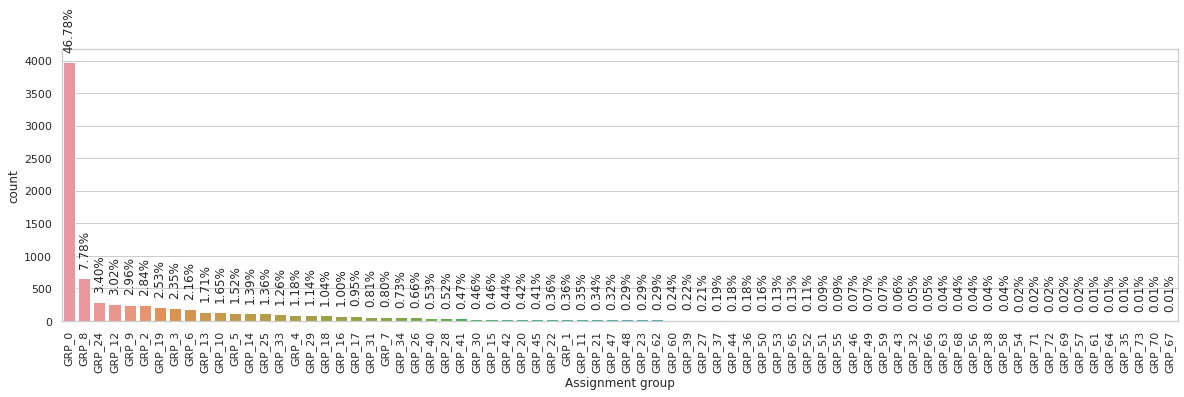

In [ ]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

### Observation
- This is a imbalanced dataset, with majority of incidents are from Group 0 followed by Group 8 , 24 , 12 , 9 , 2 and so on
- There are few classes which just have less 10 incidents pers class and even classed with just 1 or 2  incidents, need to see if we can drop those rows due to the lack of samples representing those classes. They might not be of much help as a predictor

### Lets view the top 20 Assignment groups with highest number of tickets

In [ ]:
df_top_20 = df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


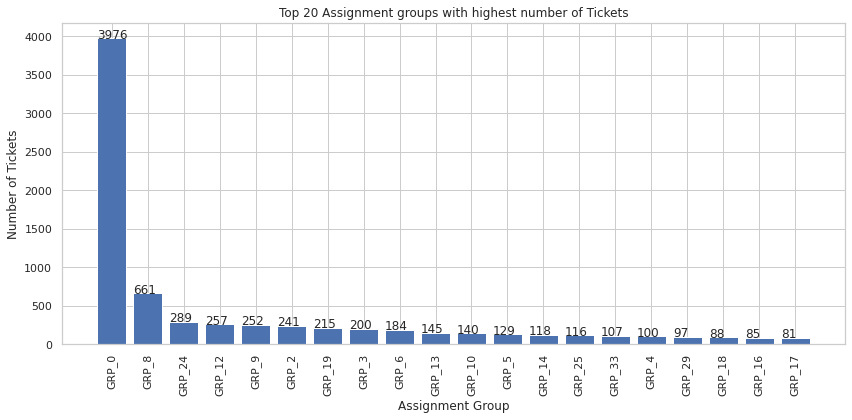

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

### Lets view the bottom 20 Assignment groups with less number of tickets

In [ ]:
df_bottom_20 = df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_35,1
3,GRP_73,1
4,GRP_70,1
5,GRP_67,1
6,GRP_54,2
7,GRP_71,2
8,GRP_72,2
9,GRP_69,2


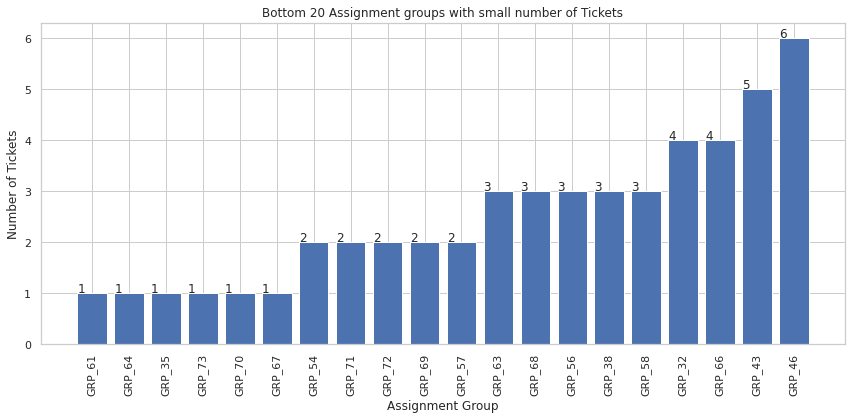

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

### Distribution of tickets counts in various bins

In [ ]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


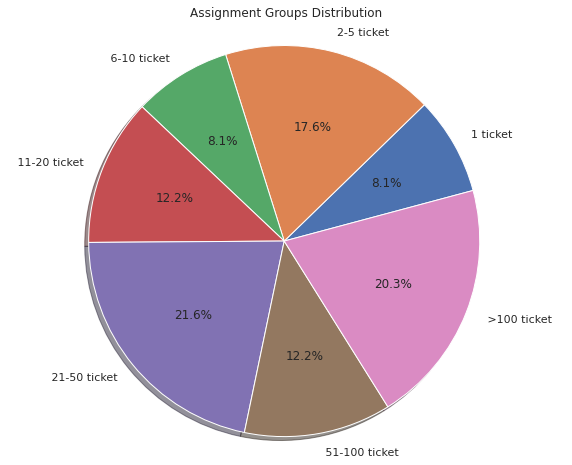

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

- We see that there are 6 Assignment Group’s for which just have 1 ticket in the dataset
- There are 15 Assignment group’s which have more than 100 tickets. 
- Only 20% of the Assignment groups have greater than 100 tickets.

### Missing Values

There are missing values in the dataset, within 'Short decription' and 'Description' columns, lets view the missing values and impute them.

In [ ]:
df_incidents[df_incidents['Short description'].isnull()]

,Short description,Description,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


In [ ]:
df_incidents[df_incidents['Description'].isnull()]

,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


- Lets replace nan values with '' (empty string)
- And then concatenate Short Description and Description to form a single column named 'New_Description' and use it as a predictor. so that we won't miss any necessary info about the ticket.


In [ ]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [ ]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

In [ ]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error


## Derive insights on ticket distribution by L1/L2 and L3

In [ ]:
df_incidents_level = df_incidents.copy()
df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

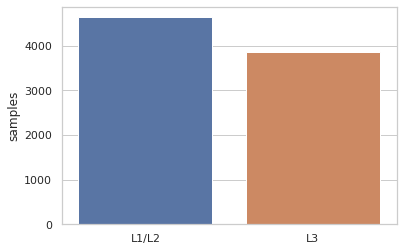

In [ ]:
x=df_incidents_level.Target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

### Characters in Short description by L1/L2 and L3

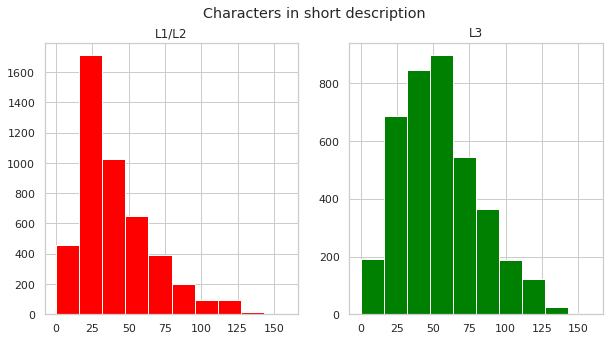

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.len()
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.len()
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Characters in short description')
plt.show()

### Words in Short description by L1/L2 and L3

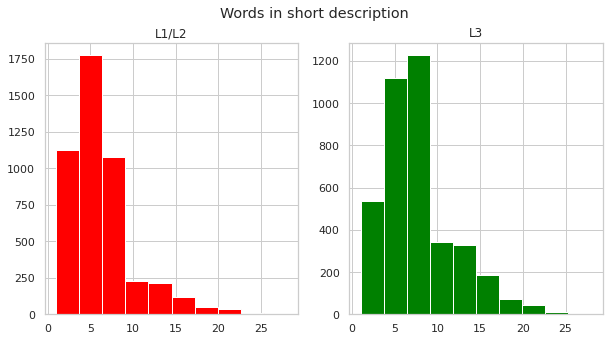

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Words in short description')
plt.show()

In [ ]:
df_incidents_level['Short description']=df_incidents_level['Short description'].apply(str)

def ave_word_len(sentence):
    words  = sentence.split(" ")
    return ((sum((len(word) for word in words))/len(words)))

df_incidents_level["short_description_avg_word_len"] = df_incidents_level["Short description"].apply(ave_word_len)

### Average word length in Short description by L1/L2 and L3

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py

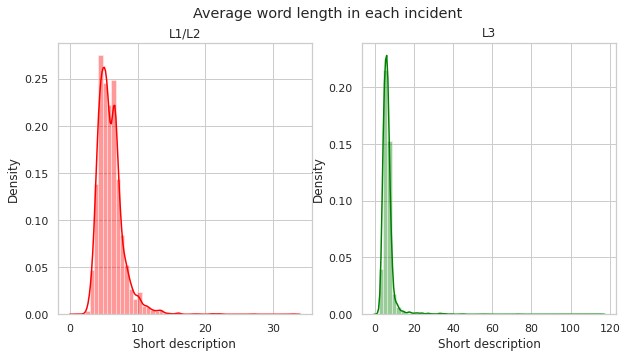

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('L1/L2')
word=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('L3')
fig.suptitle('Average word length in each incident');

### Number of upper case in Short description by L1/L2 and L3

In [ ]:
df_incidents_level["short_description_nupper"] = df_incidents_level["Short description"].apply((lambda word: len([x for x in word.split() if x.isupper()])))
df_incidents_level[["Short description","short_description_nupper"]].sort_values(by = "short_description_nupper",ascending = False).head()

,Short description,short_description_nupper
4693,hzptilsw wusdajqv : log on balancing error for...,2
5964,add im:mfg_planner_reference to the miiadmin e...,2
4976,"please check the ale in detail, we have ongoin...",2
1848,erp SID_34 and erp SID_1 password reset,2
4324,reset password user zigioachstyac - SID_34 /SI...,2


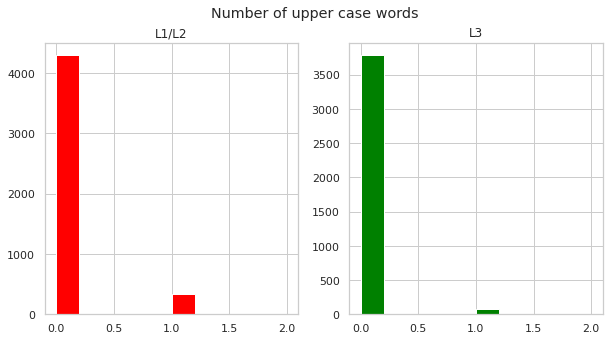

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_nupper']
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_nupper']
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Number of upper case words')
plt.show()

### Number of digits in Short description by L1/L2 and L3

In [ ]:
df_incidents_level["short_description_ndigits"] = df_incidents_level["Short description"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_incidents_level[["Short description","short_description_ndigits"]].sort_values(by = "short_description_ndigits",ascending = False).head()

,Short description,short_description_ndigits
5469,sto 5019179518 is for 2 pcs of material 631688...,4
2867,prdord 226040587 226040835 226040589 2...,4
6287,i am stuck. has 3 lines. lines 40 and 50...,4
145,unable to start dell 7350 2 in 1 device,3
3235,no audio in dell 7350 2 in 1 tablet,3


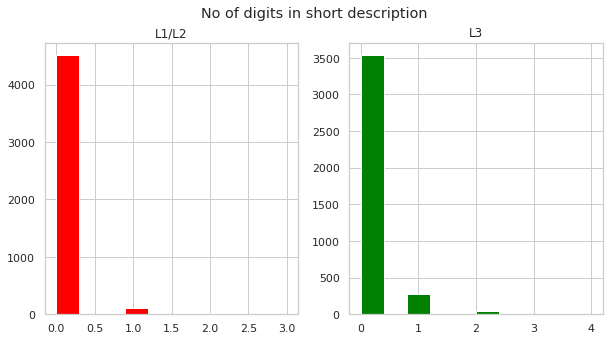

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_ndigits']
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_ndigits']
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('No of digits in short description')
plt.show()

In [ ]:
df_incidents_level.head(10)

,Short description,Description,Assignment group,New_Description,Target,short_description_avg_word_len,short_description_nupper,short_description_ndigits
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,L1/L2,5.000000,0,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,L1/L2,7.000000,0,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,L1/L2,2.800000,0,0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,L1/L2,5.000000,0,0
4,skype error,skype error,GRP_0,skype error skype error,L1/L2,3.333333,0,0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in to engineering tool and skype...,L1/L2,4.222222,0,0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,event: critical:HostName_221.company.com the v...,L3,9.600000,0,0
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,ticket_no1550391- employment status - new non-...,L1/L2,7.333333,0,0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,unable to disable add ins on outlook unable to...,L1/L2,4.285714,0,0
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,ticket update on inplant_874773 ticket update ...,L1/L2,7.000000,0,0


## Let use word cloud to visualize the type of words used in Description

One very handy visualization tool for a data scientist when it comes to any sort of natural language processing is plotting "Word Cloud". A word cloud (as the name suggests) is an image that is made up of a mixture of distinct words which may make up a text or book and where the size of each word is proportional to its word frequency in that text (number of times the word appears). Here our words can simply be taken from the column "text"

In [ ]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

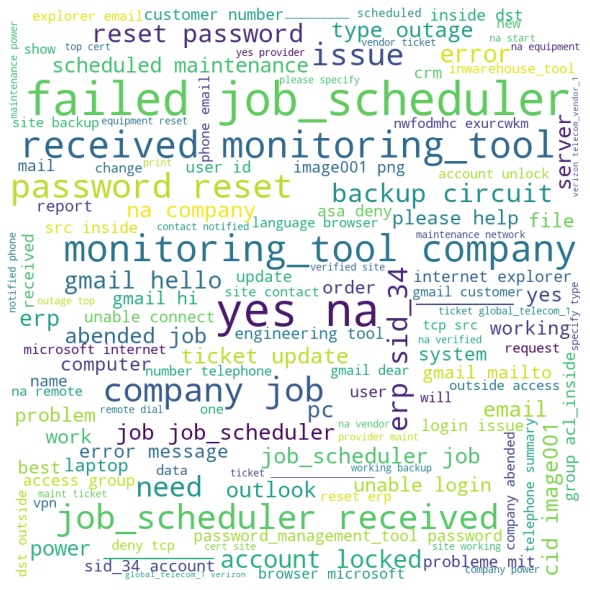

In [ ]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(df_incidents.New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Lets view the word cloud of top 4 assignment groups to see the kind of tickets assigned to them

### Word Cloud for tickets with Assignment group 'GRP_0'

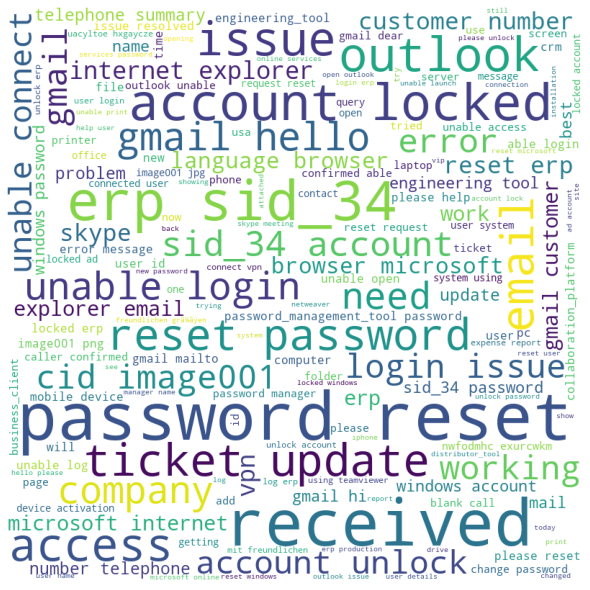

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_0 seems to have tickets related to password reset, access issues , login issue, connectivity issue etc..

### Word Cloud for tickets with Assignment group 'GRP_8'

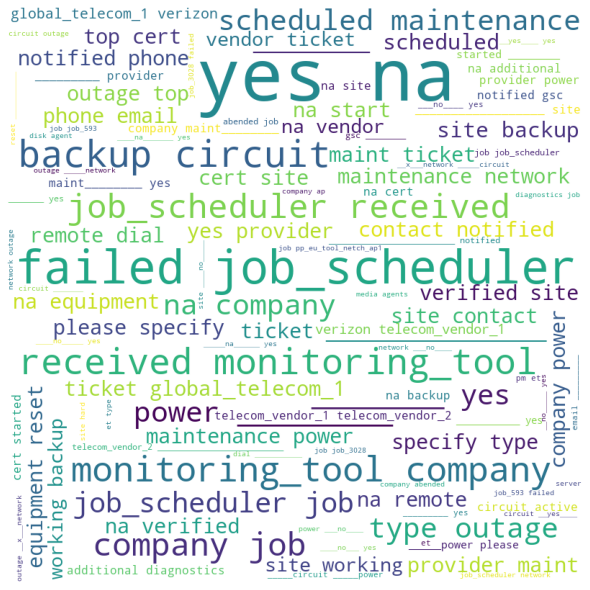

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_8'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

### Word Cloud for tickets with Assignment group 'GRP_12'

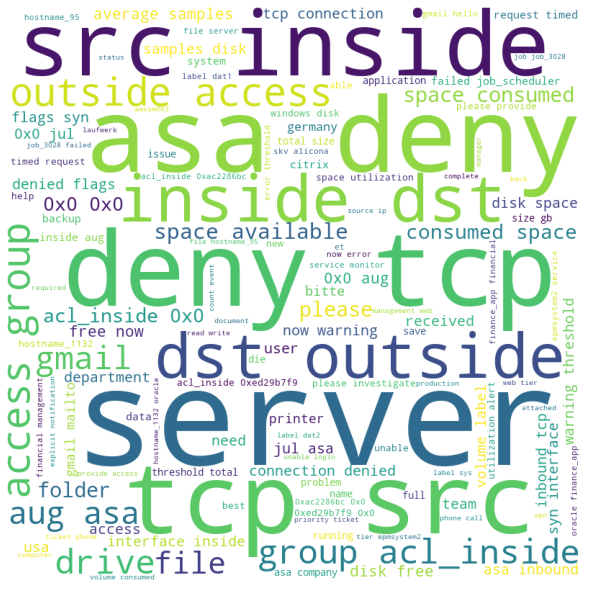

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_12'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_12 contains tickets related to systems like  disk space issues, t network issues like tie out, citrix issue, connectivity timeout etc.

### Word Cloud for tickets with Assignment group 'GRP_24'

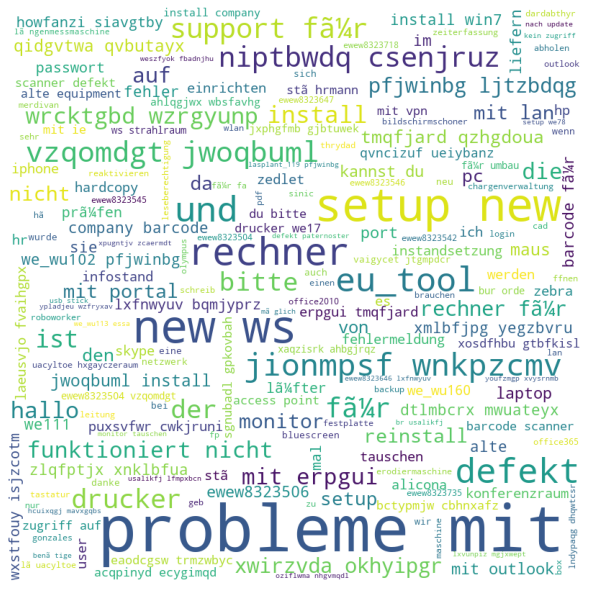

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

GRP_24 - Tickets are mainly in german, these tickets need to be translated to english before passing it to our model.

### Seems like there are few tickets with description in some other language, probably in German

In [ ]:
df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description

222     support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...
223     probleme mit bluescreen . hallo ,\n\nes ist er...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
305     probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzr...
306     support fÃ¼r we111\zlqfptjx xnklbfua support f...
349     install EU_tool \laeusvjo fvaihgpx install EU_...
441     probleme mit portal \knlrgsiv cqvuexjz problem...
446     setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...
453     probleme mit erpgui \tmqfjard qzhgdoua problem...
454     support fÃ¼r fa.thrydsss-funke \laeusvjo fvaih...
455     bildband  tauschen \drucker we68678 \vepxdgot ...
555     probleme mit fixiereinheit we101 \qvncizuf uei...
586     probleme mit bluescreen  hallo ,\n\ngerade ebe...
589     probleme mit lan fÃ¼r rechner erodiermaschine\...
744     drucker in lÃ¶we uacyltoe hxgayczeraum knicrht...
748     reinst

### Lets analyse this further

In [ ]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error


In [ ]:
#Lets encode the string, to make it easier to be passed to language detection api.
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df_incidents['New_Description'] = df_incidents['New_Description'].apply(fn_decode_to_ascii)

### Detect the language the ticket is raised by

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 5.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=3ead57271a80130106bedb8102821c57c50285df0fffa9adad0762737e229e83
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df_incidents['language'] = df_incidents['New_Description'].apply(fn_lan_detect)

In [ ]:
df_incidents["language"].value_counts()

en    7106
de     378
af     280
it     135
fr     108
no     108
nl      71
sv      53
es      46
ca      37
pl      34
da      30
pt      18
ro      16
cy      15
tl      15
sl      11
sq       8
hr       7
et       5
id       5
so       3
fi       3
sk       2
lt       2
cs       2
vi       1
lv       1
Name: language, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


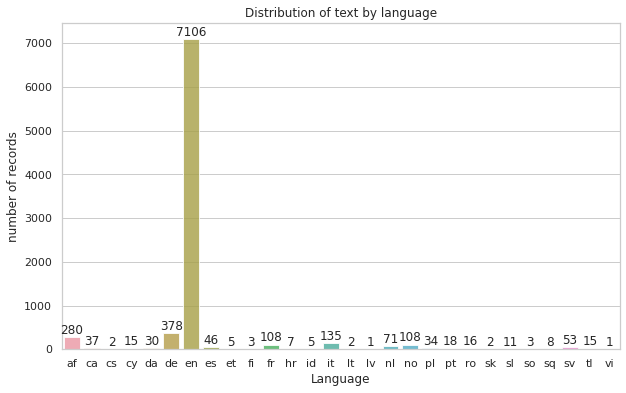

In [ ]:
x = df_incidents["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

- We can see that most of the tickets are in english, followed by tickets in German language. We need to translate these into english.
- We will be using google translate package to translate

In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 983kB 8.7MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=4b0b7ea83cee9c04fa9c79358de8285bfa5dc43f3cb732f6b73e24da6d8e9176
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=ad29cb93446640681d4cc9fa6e2669e38b24e6e52cbd437c590f88215b7c3bac
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

### Translate the text to English

In [ ]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df_incidents['English_Description'] = df_incidents.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)

Note: Google Translate API is used for translating the german text, however there is limit imposed from Google on the number of requests from a particular ip address. So the traslation was done in batches and save to a file. Which will be used for further processing

#### We mainly see that GRP_0 contains incidents related to account lockout, lets see if other groups also have incidents related to account lockout

In [ ]:
df_incidents[df_incidents["Short description"].str.contains("account lock")]["Assignment group"].value_counts()

GRP_0     226
GRP_2       3
GRP_72      1
GRP_34      1
Name: Assignment group, dtype: int64

In [ ]:
df_incidents[df_incidents["Short description"].str.contains("oneteam")]["Assignment group"].value_counts()

GRP_0     3
GRP_73    1
Name: Assignment group, dtype: int64

In [ ]:
df_incidents.head(10)

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in to engineering tool and skype...,en,unable to log in to engineering tool and skype...
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,event: critical:HostName_221.company.com the v...,en,event: critical:HostName_221.company.com the v...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,ticket_no1550391- employment status - new non-...,en,ticket_no1550391- employment status - new non-...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,unable to disable add ins on outlook unable to...,en,unable to disable add ins on outlook unable to...
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,ticket update on inplant_874773 ticket update ...,en,ticket update on inplant_874773 ticket update ...


In [ ]:
df_incidents.to_csv(r'translated.csv')

## Data Cleaning
Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. 

In [ ]:
!pwd

/content/drive/My Drive/projects/AutoTicketAssignment


In [ ]:
cd drive/MyDrive/projects/AutoTicketAssignment/

[Errno 2] No such file or directory: 'drive/MyDrive/projects/AutoTicketAssignment/'
/content/drive/MyDrive/projects/AutoTicketAssignment


In [ ]:
df_tranlated_text = pd.read_csv('/content/drive/MyDrive/projects/AutoTicketAssignment/translated.csv',encoding='utf-8')
df_tranlated_inc = df_tranlated_text.drop(['Short description','Unnamed: 0','language','New_Description'],axis=1)
df_tranlated_inc.English_Description=df_tranlated_inc.English_Description.astype(str)
df_tranlated_inc.head()

,Description,Assignment group,English_Description
0,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,GRP_0,skype error skype error


In [ ]:
df_tranlated_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Description          8499 non-null   object
 1   Assignment group     8500 non-null   object
 2   English_Description  8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [ ]:
import string
import re
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text


In [ ]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['English_Description'].apply(lambda x: clean_text(x))
df_tranlated_inc.drop(['English_Description'],axis=1,inplace=True)

In [ ]:
df_tranlated_inc['cleaned_description'].head()

0    login issue verified user detailsemployee  man...
1    outlook  hmjdrvpbkomuaywn teammy meetingsskype...
2    cant log in to vpn  eylqgodmybqkwiami cannot l...
3    unable to access hrtool page unable to access ...
4                            skype error  skype error 
Name: cleaned_description, dtype: object

### Removal of Stop Words
Now, let's get rid of the stopwords i.e words which occur very frequently but have no possible value like a, an, the, are etc.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## Removal of Stop Words

from nltk.corpus import stopwords
stop = stopwords.words('english')
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df_tranlated_inc['cleaned_description'].head()

0    login issue verified user detailsemployee mana...
1    outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2        cant log vpn eylqgodmybqkwiami cannot log vpn
3    unable access hrtool page unable access hrtool...
4                              skype error skype error
Name: cleaned_description, dtype: object

### Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
## Lemmatization
import nltk
#nltk.download('wordnet')

from textblob import Word
df_tranlated_inc['cleaned_description']= df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
df_tranlated_inc['cleaned_description'].head()

0    login issue verified user detailsemployee mana...
1    outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2        cant log vpn eylqgodmybqkwiami cannot log vpn
3    unable access hrtool page unable access hrtool...
4                              skype error skype error
Name: cleaned_description, dtype: object

### take a look at the average (mean) number of words in each ticket, and the longest and shortest description in our data set

In [ ]:
df_tranlated_inc['num_wds'] = df_tranlated_inc['cleaned_description'].apply(lambda x: len(x.split()))
df_tranlated_inc['num_wds'].mean()

17.341882352941177

In [ ]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())

620
0


In [ ]:
len(df_tranlated_inc[df_tranlated_inc['num_wds']==0])

46

### Consider tickets with words greater than 1

In [ ]:
df_tranlated_inc= df_tranlated_inc[df_tranlated_inc['num_wds']>1]

In [ ]:
print(df_tranlated_inc['num_wds'].max())
print(df_tranlated_inc['num_wds'].min())

620
2


### Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))


df_tranlated_inc['avg_word'] = df_tranlated_inc['cleaned_description'].apply(lambda x: avg_word(str(x)))
df_tranlated_inc.head()

,Description,Assignment group,cleaned_description,num_wds,avg_word
0,-verified user details.(employee# & manager na...,GRP_0,login issue verified user detailsemployee mana...,19,7.157895
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook hmjdrvpbkomuaywn teammy meetingsskype ...,13,7.538462
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log vpn eylqgodmybqkwiami cannot log vpn,7,5.571429
3,unable to access hr_tool page,GRP_0,unable access hrtool page unable access hrtool...,8,5.500000
4,skype error,GRP_0,skype error skype error,4,5.000000


## visualize a distribution of the description word counts to see how skewed our average might be by outliers. Let's generate another plot to take a look:

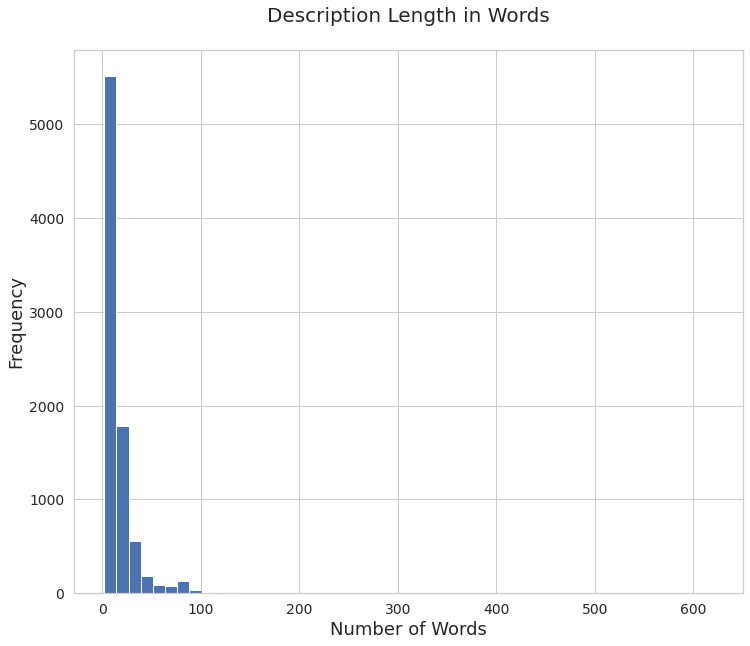

In [ ]:
ax=df_tranlated_inc['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Description Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

### Number of unique words in each article

In [ ]:
df_tranlated_inc['uniq_wds'] = df_tranlated_inc['cleaned_description'].str.split().apply(lambda x: len(set(x)))
df_tranlated_inc['uniq_wds'].head()

0    16
1    12
2     5
3     4
4     2
Name: uniq_wds, dtype: int64

### average (mean) number of unique words per incident, and the minimum and maximum unique word counts.

In [ ]:
print(df_tranlated_inc['uniq_wds'].mean())
print(df_tranlated_inc['uniq_wds'].min())
print(df_tranlated_inc['uniq_wds'].max())

11.82640615748964
1
370


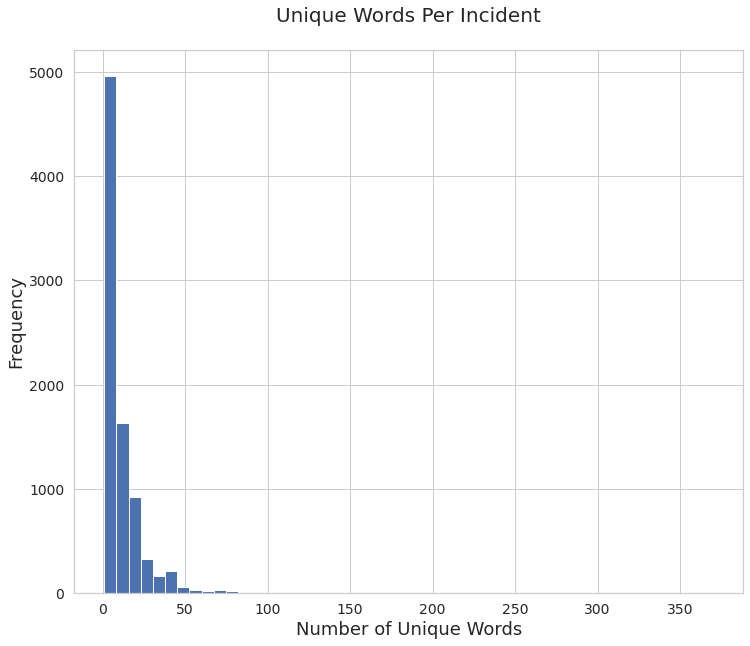

In [ ]:
ax=df_tranlated_inc['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Incident\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

When we plot this into a chart, we can see that while the distribution of unique words is still skewed, it looks a bit similar to the distribution based on total word counts we generated earlier.

### Mean Number of Words in tickets per Assignment Group

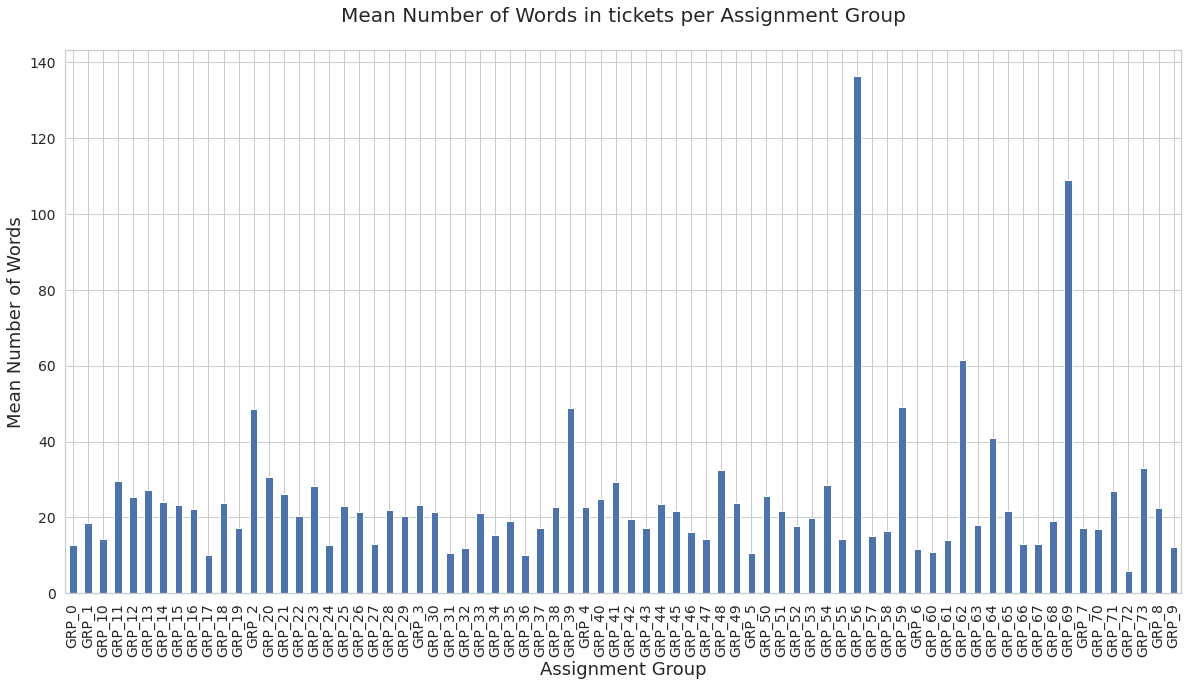

In [ ]:
assign_grps = df_tranlated_inc.groupby('Assignment group')
ax=assign_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

### Mean Number of Unique Words in tickets per Assignment Group

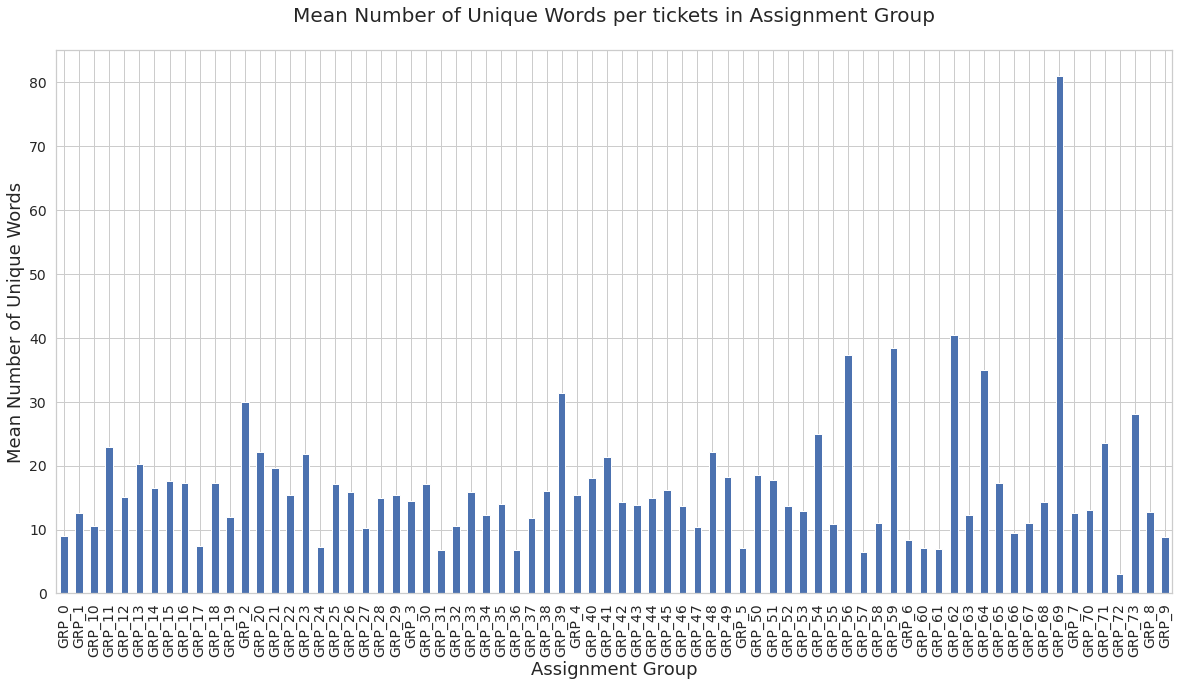

In [ ]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

Finally, let’s look at the most common words over the entire corpus.

In [ ]:
wd_counts = Counter()
for i, row in df_tranlated_inc.iterrows():
    wd_counts.update(row['cleaned_description'].split())
    
wd_counts.most_common(20)

[('password', 2047),
 ('erp', 1934),
 ('jobscheduler', 1915),
 ('failed', 1706),
 ('yesnona', 1568),
 ('unable', 1474),
 ('reset', 1422),
 ('user', 1400),
 ('t', 1254),
 ('issue', 1223),
 ('job', 1219),
 ('account', 1196),
 ('access', 1085),
 ('error', 957),
 ('need', 870),
 ('outlook', 857),
 ('ticket', 841),
 ('company', 840),
 ('working', 813),
 ('site', 793)]

Above, we can see some pretty predictable words

### Tokenization
Tokenization is a process that splits an input sequence into so-called tokens where the tokens can be a word, sentence, paragraph etc.

In [ ]:
import nltk
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_tranlated_inc['token_desc'] = df_tranlated_inc['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
df_tranlated_inc['token_desc'].head()

0    [login, issue, verified, user, detailsemployee...
1    [outlook, hmjdrvpbkomuaywn, teammy, meetingssk...
2    [cant, log, vpn, eylqgodmybqkwiami, cannot, lo...
3    [unable, access, hrtool, page, unable, access,...
4                         [skype, error, skype, error]
Name: token_desc, dtype: object

In [ ]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df_tranlated_inc['token_desc'] = df_tranlated_inc['token_desc'].apply(lambda x : combine_text(x))

In [ ]:
df_tranlated_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 8499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          8444 non-null   object 
 1   Assignment group     8445 non-null   object 
 2   cleaned_description  8445 non-null   object 
 3   num_wds              8445 non-null   int64  
 4   avg_word             8445 non-null   float64
 5   uniq_wds             8445 non-null   int64  
 6   token_desc           8445 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 527.8+ KB


In [ ]:
df_tranlated_inc.to_csv("cleaned_data_1.csv", index = False)

In [ ]:
#del df_tranlated_inc['Unnamed: 0']

In [ ]:
df_tranlated_inc_new=df_tranlated_inc

In [ ]:
del df_tranlated_inc_new['Description']

In [ ]:
df_tranlated_inc_new.to_csv("processed_file_modellling.csv", index = False)

In [ ]:
df_tranlated_inc_new.head(10)

,Assignment group,cleaned_description,num_wds,avg_word,uniq_wds,token_desc,Target
0,GRP_0,login issue verified user detailsemployee mana...,19,7.157895,16,login issue verified user detailsemployee mana...,L1/L2
1,GRP_0,outlook hmjdrvpbkomuaywn teammy meetingsskype ...,13,7.538462,12,outlook hmjdrvpbkomuaywn teammy meetingsskype ...,L1/L2
2,GRP_0,cant log vpn eylqgodmybqkwiami cannot log vpn,7,5.571429,5,cant log vpn eylqgodmybqkwiami cannot log vpn,L1/L2
3,GRP_0,unable access hrtool page unable access hrtool...,8,5.500000,4,unable access hrtool page unable access hrtool...,L1/L2
4,GRP_0,skype error skype error,4,5.000000,2,skype error skype error,L1/L2
5,GRP_0,unable log engineering tool skype unable log e...,10,5.800000,5,unable log engineering tool skype unable log e...,L1/L2
6,GRP_1,event critical value mountpoint threshold orac...,12,7.166667,6,event critical value mountpoint threshold orac...,L3
7,GRP_0,employment status new nonemployee employment s...,8,7.500000,4,employment status new nonemployee employment s...,L1/L2
8,GRP_0,unable disable add in outlook unable disable a...,10,5.000000,5,unable disable add in outlook unable disable a...,L1/L2
9,GRP_0,ticket update ticket update,4,6.000000,2,ticket update ticket update,L1/L2


In [ ]:
df_incidents_level['Target'].count()

8500

In [ ]:
df_tranlated_inc['Target']=df_incidents_level['Target']

In [ ]:
df_tranlated_inc.count()

Description            8444
Assignment group       8445
cleaned_description    8445
num_wds                8445
avg_word               8445
uniq_wds               8445
token_desc             8445
Target                 8445
dtype: int64

In [ ]:
df_tranlated_inc = pd.read_csv('cleaned_data.csv',encoding='utf-8')
df_tranlated_inc.head()

,Unnamed: 0,Description,Assignment group,cleaned_description,num_wds,avg_word,uniq_wds,token_desc
0,0,-verified user details.(employee# & manager na...,GRP_0,login issue verified user detailsemployee mana...,19,7.157895,16,login issue verified user detailsemployee mana...
1,1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook hmjdrvpbkomuaywn teammy meetingsskype ...,13,7.538462,12,outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2,2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log vpn eylqgodmybqkwiami cannot log vpn,7,5.571429,5,cant log vpn eylqgodmybqkwiami cannot log vpn
3,3,unable to access hr_tool page,GRP_0,unable access hrtool page unable access hrtool...,8,5.500000,4,unable access hrtool page unable access hrtool...
4,4,skype error,GRP_0,skype error skype error,4,5.000000,2,skype error skype error


### Transforming tokens to a vector using tfidf

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(max_features=250, analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
inc_tfidf = tfidf.fit_transform(df_tranlated_inc['token_desc'])

In [ ]:
len(inc_tfidf.todense())

8445

In [ ]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

Below is the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
erp,3.109000
job,3.112910
password,3.132693
jobscheduler,3.165184
failed,3.266082
unable,3.279875
reset,3.286844
issue,3.327278
failed jobscheduler,3.344414
monitoringtooljob,3.374491


Below is the 10 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
dst outside,8.095538
outside accessgroup,8.095538
aclinside,7.643553
asa deny,7.643553
dst,7.643553
src,7.643553
inside dst,7.643553
src inside,7.643553
accessgroup aclinside,7.643553
accessgroup,7.643553


### TF-IDF Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


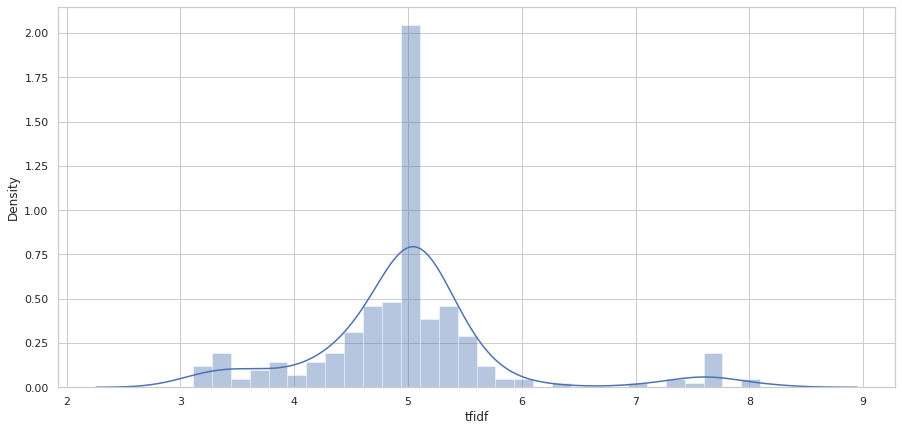

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(tfidf["tfidf"])

Given the high dimension of our tfidf matrix, we need to reduce their dimension using the Singular Value Decomposition (SVD) technique. And to visualize our vocabulary, we could next use t-SNE to reduce the dimension to 2. t-SNE is more suitable for dimensionality reduction to 2 or 3.

### Dimentionality reduction using t-SNE

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_comp=10
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(inc_tfidf)

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8445 samples in 0.015s...
[t-SNE] Computed neighbors for 8445 samples in 0.717s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8445
[t-SNE] Computed conditional probabilities for sample 2000 / 8445
[t-SNE] Computed conditional probabilities for sample 3000 / 8445
[t-SNE] Computed conditional probabilities for sample 4000 / 8445
[t-SNE] Computed conditional probabilities for sample 5000 / 8445
[t-SNE] Computed conditional probabilities for sample 6000 / 8445
[t-SNE] Computed conditional probabilities for sample 7000 / 8445
[t-SNE] Computed conditional probabilities for sample 8000 / 8445
[t-SNE] Computed conditional probabilities for sample 8445 / 8445
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.670166
[t-SNE] KL divergence after 500 iterations: 0.937650


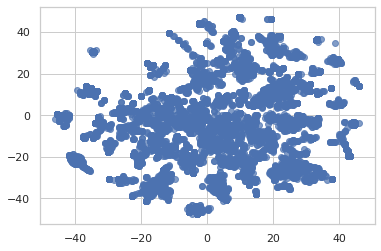

In [ ]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
plt.scatter(tfidf_df.x, tfidf_df.y, alpha=0.7)

<b> We can see there are multiple smaller clusters here, each cluster could be the type of tickets that we have in the dataset. </b>

### Generate Topics using LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# create count vectorizer first
cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(df_tranlated_inc['token_desc'])

# generate topic models using Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
X_topics = lda_model.fit_transform(cvz)

In [ ]:
n_top_words = 10
topic_summaries = []

# get topics and topic terms
topic_word = lda_model.components_ 
vocab = cvectorizer.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: ticket | update | printer | unable | ticket update | print | device | erp | outside | log
Topic 1: issue | error | outlook | working | vpn | crm | unable | message | open | connect
Topic 2: password | reset | access | password reset | user | login | unable | erp | need | reset password
Topic 3: email | erp | server | help | change | new | order | need | request | passwordmanagementtool
Topic 4: jobscheduler | failed | failed jobscheduler | job | monitoringtooljob | jobscheduler monitoringtooljob | job failed | monitoringtooljob failed | abended | job jobscheduler
Topic 5: call | mit | skype | probleme | probleme mit | alert | uacyltoe | agent | port | hxgaycze
Topic 6: nicht | und | die | fr | bitte | der | pc | ist | monitor | eutool
Topic 7: account | locked | erp | account locked | erp account | computer | window | network | user | add
Topic 8: yesnona | site | power | circuit | backup | backup circuit | outage | et | company | network
Topic 9: event | id | unlock | phone |

<b> We can see that password related tickets are classified as topic 3, account related tickets in topic 7 , job scheduler related tickets in topic 8 etc </b>

### tf-idf array into pandas dataframe

In [ ]:
# collect the tfid matrix in numpy array
array = inc_tfidf.todense()

# store the tf-idf array into pandas dataframe
df_inc = pd.DataFrame(array)
df_inc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.234165,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306918,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268917,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.588859,0.0,0.0,0.0,0.289544,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306897,0.34825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626859,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000

#### Adding the output to the dataframe

In [ ]:
df_tranlated_inc.head()

,Unnamed: 0,Description,Assignment group,cleaned_description,num_wds,avg_word,uniq_wds,token_desc
0,0,-verified user details.(employee# & manager na...,GRP_0,login issue verified user detailsemployee mana...,19,7.157895,16,login issue verified user detailsemployee mana...
1,1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook hmjdrvpbkomuaywn teammy meetingsskype ...,13,7.538462,12,outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2,2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log vpn eylqgodmybqkwiami cannot log vpn,7,5.571429,5,cant log vpn eylqgodmybqkwiami cannot log vpn
3,3,unable to access hr_tool page,GRP_0,unable access hrtool page unable access hrtool...,8,5.500000,4,unable access hrtool page unable access hrtool...
4,4,skype error,GRP_0,skype error skype error,4,5.000000,2,skype error skype error


In [ ]:
df_inc['num_wds']= df_tranlated_inc['num_wds']
df_inc['avg_word']= df_tranlated_inc['avg_word']
df_inc['Assignment group']= df_tranlated_inc['Assignment group']
df_inc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,num_wds,avg_word,Assignment group
0,0.0,0.0,0.234165,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.588859,0.0,0.0,0.0,0.289544,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,7.157895,GRP_0
1,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,7.538462,GRP_0
2,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306897,0.34825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626859,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
features = df_inc.columns.tolist()
output = 'Assignment group'
# removing the output and the id from features
features.remove(output)

In [ ]:
df_inc_sample = df_inc[df_inc['Assignment group'].map(df_inc['Assignment group'].value_counts()) > 100]

In [ ]:
df_inc_sample.shape

(7027, 253)

In [ ]:
df_inc_sample['Assignment group'].value_counts()

GRP_0     3975
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      182
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
Name: Assignment group, dtype: int64

In [ ]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

## Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
df_inc_sample = df_tranlated_inc[df_tranlated_inc['Assignment group'].map(df_tranlated_inc['Assignment group'].value_counts()) > 100]
x = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)


log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)

In [ ]:
df_tranlated_inc.head(10)

,Unnamed: 0,Description,Assignment group,cleaned_description,num_wds,avg_word,uniq_wds,token_desc
0,0,-verified user details.(employee# & manager na...,GRP_0,login issue verified user detailsemployee mana...,19,7.157895,16,login issue verified user detailsemployee mana...
1,1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook hmjdrvpbkomuaywn teammy meetingsskype ...,13,7.538462,12,outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2,2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log vpn eylqgodmybqkwiami cannot log vpn,7,5.571429,5,cant log vpn eylqgodmybqkwiami cannot log vpn
3,3,unable to access hr_tool page,GRP_0,unable access hrtool page unable access hrtool...,8,5.500000,4,unable access hrtool page unable access hrtool...
4,4,skype error,GRP_0,skype error skype error,4,5.000000,2,skype error skype error
5,5,unable to log in to engineering tool and skype,GRP_0,unable log engineering tool skype unable log e...,10,5.800000,5,unable log engineering tool skype unable log e...
6,6,event: critical:HostName_221.company.com the v...,GRP_1,event critical value mountpoint threshold orac...,12,7.166667,6,event critical value mountpoint threshold orac...
7,7,ticket_no1550391- employment status - new non-...,GRP_0,employment status new nonemployee employment s...,8,7.500000,4,employment status new nonemployee employment s...
8,8,unable to disable add ins on outlook,GRP_0,unable disable add in outlook unable disable a...,10,5.000000,5,unable disable add in outlook unable disable a...
9,9,ticket update on inplant_874773,GRP_0,ticket update ticket update,4,6.000000,2,ticket update ticket update


### Naive Bayes classifier for multinomial models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

predictions = nb.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))


log_entry = pd.DataFrame([["MultinomialNB",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.6770981507823614
f1 score 0.7867105775905945
logloss: 1.318 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       795
           1       0.00      0.00      0.00        28
           2       0.75      0.17      0.28        52
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        43
           6       0.71      0.10      0.18        48
           7       0.92      0.38      0.54        58
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        40
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        36
          13       0.54      0.92      0.68       132
          14       0.00      0.00      0.00        51

    accuracy                           0.68      1406
   macro

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Linear Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC

svc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42))),
               ])
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                         class_weight=None,
             

In [ ]:
y_pred = svc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print (focal_loss(alpha=.25, gamma=2))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LinearSVC",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7339971550497866
f1 score 0.7514229024446009
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       795
           1       0.64      0.32      0.43        28
           2       0.62      0.54      0.58        52
           3       0.73      0.55      0.63        29
           4       0.55      0.25      0.34        24
           5       0.62      0.23      0.34        43
           6       0.72      0.44      0.55        48
           7       0.85      0.91      0.88        58
           8       0.92      0.48      0.63        23
           9       0.57      0.30      0.39        40
          10       0.50      0.19      0.28        21
          11       1.00      0.04      0.07        26
          12       0.19      0.92      0.31        36
          13       0.91      0.39      0.55       132
          14       0.75      0.18      0.29        51

    accuracy                           0.73      1406
   macro avg       0.69 

### SGD Classifier


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [ ]:
y_pred = sgd.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SGDClassifier",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.6913229018492176
f1 score 0.7410972130405975
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       795
           1       0.00      0.00      0.00        28
           2       0.75      0.29      0.42        52
           3       0.71      0.17      0.28        29
           4       0.40      0.08      0.14        24
           5       1.00      0.07      0.13        43
           6       0.88      0.31      0.46        48
           7       0.88      0.79      0.84        58
           8       1.00      0.26      0.41        23
           9       0.00      0.00      0.00        40
          10       1.00      0.10      0.17        21
          11       0.13      0.81      0.22        26
          12       1.00      0.25      0.40        36
          13       0.88      0.38      0.53       132
          14       1.00      0.10      0.18        51

    accuracy                           0.69      1406
   macro avg       0.69 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [ ]:
y_pred = logreg.predict(X_test)
predictions = logreg.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LogisticRegression",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7624466571834992
f1 score 0.7844722314835846
logloss: 1.124 
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       795
           1       0.67      0.29      0.40        28
           2       0.54      0.52      0.53        52
           3       0.73      0.66      0.69        29
           4       0.53      0.38      0.44        24
           5       0.42      0.40      0.41        43
           6       0.66      0.60      0.63        48
           7       0.90      0.90      0.90        58
           8       0.76      0.57      0.65        23
           9       0.57      0.42      0.49        40
          10       0.50      0.33      0.40        21
          11       0.50      0.04      0.07        26
          12       1.00      0.25      0.40        36
          13       0.56      0.94      0.70       132
          14       0.77      0.20      0.31        51

    accuracy                           0.76      1406
   macro

### Xgboost

In [ ]:
import xgboost as xgb

xgboost = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)),
               ])
xgboost.fit(X_train, y_train)




Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missi

In [ ]:
y_pred = xgboost.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["Xgboost",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7496443812233285
f1 score 0.7891451991315116
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       795
           1       0.36      0.14      0.21        28
           2       0.60      0.50      0.55        52
           3       0.60      0.31      0.41        29
           4       0.33      0.12      0.18        24
           5       0.44      0.16      0.24        43
           6       0.71      0.42      0.53        48
           7       0.88      0.88      0.88        58
           8       0.73      0.48      0.58        23
           9       0.48      0.25      0.33        40
          10       0.69      0.43      0.53        21
          11       0.50      0.04      0.07        26
          12       0.83      0.28      0.42        36
          13       0.55      0.92      0.69       132
          14       0.73      0.16      0.26        51

    accuracy                           0.75      1406
   macro avg       0.62 

In [ ]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])

,accuracy,f1_score
Classifier,,
SGDClassifier,0.691323,0.741097
LinearSVC,0.733997,0.751423
LogisticRegression,0.762447,0.784472
MultinomialNB,0.677098,0.786711
Xgboost,0.749644,0.789145


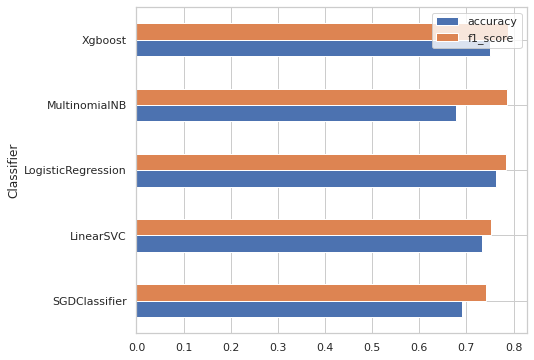

In [ ]:
log.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

# Conclusions

- We first analysed the dataset provided to us, undestood the structure of the data provided - number of columns, field , datatypes etc.
- We did Exploratory Data Analysis to derive further insights from this data set and we found that
    - Data is very much imbalanced, there are around ~45% of the Groups with less than 20 tickets.
    - Few of the tickets are in foreign language like German
    - The data has lot of noise in it, for eg- few tickets related to account setup are spread across multiple assignment groups.
    
- We performed the data cleaning and preprocessing
    - Translation: A small number of tickets were written in German. Hence, we used the Google translate python api  to convert German to English to generate the input data for the next steps. However, the google translator rest api can only process a limited number of texts on a daily basis, so we translated the text in batches and saved the file for further processing.
    - Make text all lowercase so that the algorithm does not treat the same words in different cases as different
    - Removing Noise i.e everything that isn’t in a standard number or letter i.e Punctuation, Numerical values
    - Removing extract spaces
    - Removed punctuations
    - Removed words containing numbers
    - Stopword Removal: Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words
    - Lemmatization
    - Tokenization: Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.
    

- We then ran a basic benchmarck model using the cleaned and preprocessed dataset
    - Since the dataset is very imbalanced, We considered a subset of groups for predictions.  In 74 groups, 46% of tickets belong to group 1 and 16 groups just have more than 100 tickets, rest of the Assignment groups have very less ticket counts which might not add much value to the model prediction. If we conducted random sampling towards all the subcategories, then we would face a problem that we might miss all the tickets in some categories. Hence, we considered the groups that have more than 100 tickets. 
    - We trained the data using below models:
        - Multinomial NB
        - Linear Support vector Machine
        - Logistic regression
        - Xgboost
        
- LinearSVC gives better performance with 
    - accuracy 0.833642
    - f1 score 0.818053

<b> Although, it seems like the call is biased towards GRP_0 which has a majority of samples. </b>

## Next Steps
- We could further improve the model by 
- Exploring more features out of the dataset
- hyperparameter tuning using GridsearchCV,
- try transfer learning with word embeddings and use that as a feature for modelling.
- use neural network architecture like RNN or LSTM to improve model performance.

    